# Unit 5 - Financial Planning

In [5]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import numpy as np
%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [9]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35823.60
The current value of your 5.3 ETH is $10052.62


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2023-07-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio_closing_prices = alpaca.get_bars(tickers, timeframe, start = today,end = today).df

# Reorganize the DataFrame
# Separate ticker data
AGG = portfolio_closing_prices[portfolio_closing_prices['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio_closing_prices[portfolio_closing_prices['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio_closing_prices = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
portfolio_closing_prices

AGG                                             \
                            open   high     low  close   volume trade_count   
timestamp                                                                     
2023-07-13 04:00:00+00:00  98.18  98.44  98.115  98.41  7458509       31270   

                                        SPY                                    \
                                vwap   open    high     low   close    volume   
timestamp                                                                       
2023-07-13 04:00:00+00:00  98.343983  447.9  450.38  447.45  449.56  72425241   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-07-13 04:00:00+00:00      449368  448.598241

In [16]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio_closing_prices["AGG"]["close"])
spy_close_price = float(portfolio_closing_prices["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.41
Current SPY closing price: $449.56


In [17]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price 
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22478.00
The current value of your 200 AGG shares is $19682.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = my_btc_value + my_eth_value
total_shares_value = my_spy_value + my_agg_value

data = {"Amount" : [total_crypto_value, total_shares_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index=["Crypto", "Shares"])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,45876.216
Shares,42160.000


array([<Axes: ylabel='Amount'>], dtype=object)

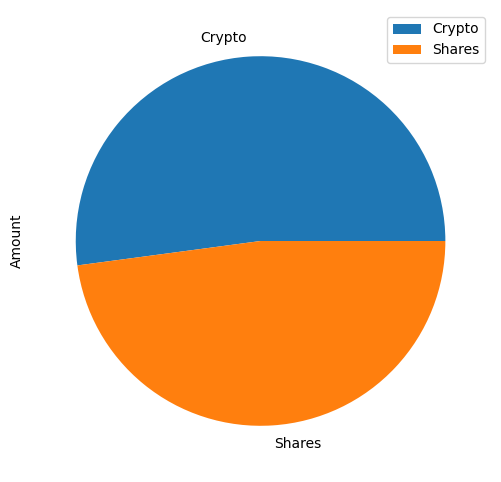

In [19]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, figsize=(11, 6))

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value
diff = emergency_fund - total_savings 

# Validate saving health
if total_savings > emergency_fund:
    print("Congrats! You have enough money in your emergency fund!")
elif total_savings == emergency_fund:
    print("Congrats! You have reached your emergency fund goal!")    
else:
    shortfall = emergency_fund - total_savings
    print(f"You are ${diff:.2f} away from reaching your emergency fund goal.")


Congrats! You have enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-13', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1Day"
tickers = ["SPY","AGG"]

# Reorganize the DataFrame
# Separate ticker data
df_stock_data = alpaca.get_bars(tickers, timeframe, start= start_date, end= end_date
).df

SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data.tail()

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2023-07-07 04:00:00+00:00  438.63  442.6400  438.300  438.55  85575882   
2023-07-10 04:00:00+00:00  438.18  439.8400  437.585  439.66  62463516   
2023-07-11 04:00:00+00:00  440.45  442.9700  439.440  442.46  64479814   
2023-07-12 04:00:00+00:00  446.39  447.4799  444.910  446.02  91949783   
2023-07-13 04:00:00+00:00  447.90  450.3800  447.450  449.56  72425241   

                                                       AGG                    \
                          trade_count        vwap     open     high      low   
timestamp                                                                      
2023-07-07 04:00:00+00:00      526143  439.918662  96.4247  96.7500  96.4247   
2023-07-10 04:00:00+00:00      419697  438.887420  96.5700  96.9400  96.5500   
2023-07-11 04:00:00+00:00      456582  441.225755  96.9400  97.0999  96.8550   
2023-07-12 04:00:00+00:00      585806  445.659246  97.5100  97.8499  97.4500   
2023-07-13 04:00:00+00:00      449368  448.598241  98.1800  98.4400  98.1150   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-07-07 04:00:00+00:00  96.53  7489292       28378  96.596365  
2023-07-10 04:00:00+00:00  96.80  8827590       25752  96.779980  
2023-07-11 04:00:00+00:00  97.01  5978762       28609  96.979786  
2023-07-12 04:00:00+00:00  97.80  7189081       23483  97.718226  
2023-07-13 04:00:00+00:00  98.41  7458509       31270  98.343983

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30)

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 110.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 120.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 130.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 140.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 150.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 160.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 170.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 180.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 190.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 200.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 210.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 220.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 230.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 240.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 250.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 260.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 270.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 280.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 290.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 300.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 310.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 320.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 330.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 340.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 350.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 360.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 370.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 380.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 390.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 400.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 410.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 420.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 430.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 440.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 450.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 460.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 470.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 480.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

Running Monte Carlo simulation number 490.


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985826,1.009859,1.010893,1.006172,1.008620,0.996687,1.004047,0.999506,1.005691,0.994025,...,1.000476,0.989128,0.998292,0.997717,0.986055,0.997038,0.993696,1.015122,0.997503,1.002379
2,0.988705,1.018806,1.017333,1.015802,1.003317,0.988365,0.999973,1.002536,1.018187,0.999628,...,1.004341,0.991595,1.014011,1.003223,0.979950,0.999213,1.002038,1.011362,1.000396,1.009181
3,0.991305,1.038902,1.028520,1.014299,1.008094,0.988943,1.002259,1.005421,1.026966,1.004615,...,0.998121,0.989900,1.017428,1.006614,0.973975,0.993544,0.996568,1.015174,1.006212,1.006090
4,0.980382,1.030141,1.037327,1.009649,1.006484,0.982116,1.015767,0.998090,1.023143,1.007303,...,1.003970,0.997968,1.019798,1.009818,0.971331,1.008841,0.994852,1.013880,1.010081,0.997876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.470777,7.660598,4.708524,3.169897,5.966026,6.041795,5.745907,8.477540,16.274004,3.994806,...,3.001958,9.613821,5.484183,9.093837,14.058324,11.888942,8.687344,8.057782,18.655824,4.970881
7557,6.528801,7.693108,4.808590,3.165705,5.925467,6.007573,5.748865,8.619896,16.195336,3.984343,...,3.027682,9.526811,5.497092,8.984536,13.982847,11.821101,8.690125,8.113911,18.882990,4.992081
7558,6.533335,7.727102,4.818943,3.170752,5.930070,6.005205,5.693346,8.626801,16.301761,3.986170,...,3.036705,9.608665,5.520201,8.957164,14.003846,11.820516,8.697340,8.164566,19.145669,5.014521
7559,6.510236,7.756006,4.816567,3.212211,5.926734,6.007518,5.656242,8.706478,16.314288,3.993217,...,3.109734,9.616264,5.573116,8.955531,14.058203,11.858776,8.710539,8.264496,19.051273,5.058413


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

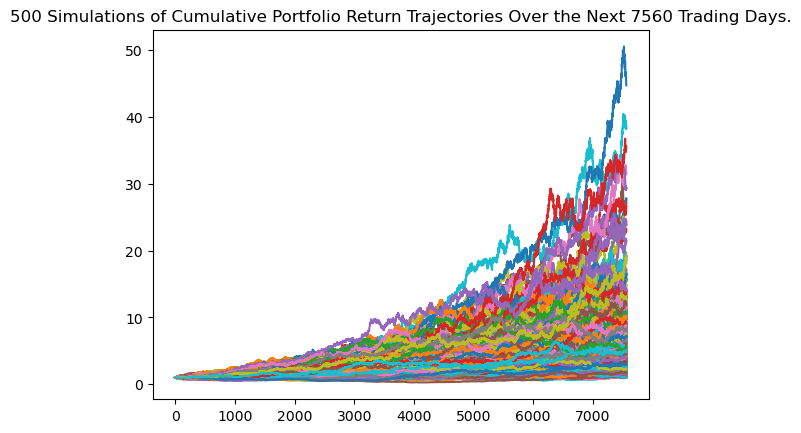

In [26]:
# Plot simulation outcomes
MC_thirty_year.plot_simulation()

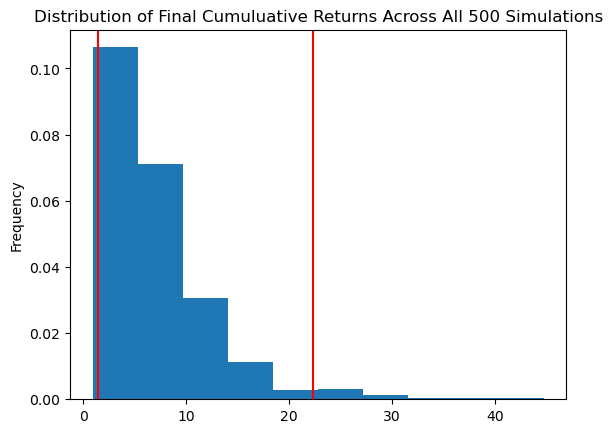

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.094474
std               5.481531
min               0.942302
25%               3.484976
50%               5.555456
75%               9.007581
max              44.752895
95% CI Lower      1.429844
95% CI Upper     22.355406
Name: 7560, dtype: float64


/Users/mmu8315/Desktop/CU-VIRT-FIN-PT-06-2023-U-LOLC/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $28596.87 and $447108.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment_increase = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_a = round(tbl[8]*initial_investment_increase,2)
ci_upper_b = round(tbl[9]*initial_investment_increase,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_a} and ${ci_upper_b}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $42895.31 and $670662.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")